In [60]:
############# SMALL PROJECT (Applied Machine Learning 2021) ##################
############# Marco Merusi, NBI ##############################################
############# SKLEARN DECISION TREE CLASSIFICATION ###########################
##############################################################################

In [61]:
# Import the necessary packages
import h5py
import pandas
import sys
from io import StringIO
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import timeit
import random
import shap

In [62]:
# Upload the Training-validation and the Test datasets
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pandas.DataFrame(f[name][:])
train = load_data('train')
test  = load_data('test')
#print (f'Shape of training data set: {train.shape}')
#print (f'Shape of test data set: {test.shape}')

# Define the array with the names of the variables that can be used for the training
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

X_all = train[all_variables] # This is the dataframe with all_variables
y = train['Truth'] # Array of the truth labels (True/False) on which to do the classification
y = pd.DataFrame(y) # Convert y to dataframe
y['Truth'] = y['Truth'].astype(int) # Convert the True/False values of y to 1 and 0
y_nrg = train['p_truth_E'] # Array of the electron energy on which to do the regression
y_nrg = pd.DataFrame(y_nrg) # Convert y_nrg to dataframe

In [63]:
# Compute the fraction of positive events in the whole train dataset
freq = y['Truth'].value_counts()
freq_train_dataset = freq[1]/(freq[0]+freq[1])
print(f"In the train dataset, the fraction of 1 (True positive occurrences) is {freq_train_dataset*100:4.3f}% on a total of {freq[0]+freq[1]} events.")

In the train dataset, the fraction of 1 (True positive occurrences) is 74.766% on a total of 162500 events.


In [64]:
# Split the Training dataset into train and validation sets
input_train, input_valid, truth_train, truth_valid = train_test_split(X_all, y, test_size=0.33, random_state=42)

In [65]:
# Set the model of my tree
model = DecisionTreeClassifier(min_samples_leaf = 20, criterion = 'entropy') 

In [66]:
# Do the training on my train dataset, also measuring the time taken
print('--------- TRAINING ---------')
start_time = timeit.default_timer()
model.fit(np.array(input_train), np.array(truth_train))  ## This trains the model on input_train by comparing to the true values in truth_train.
elapsed = timeit.default_timer() - start_time
print('----------TRAINING DONE -----') 
print(f"Training time for {len(all_variables)} variables and {freq[0]+freq[1]} events: {elapsed:6.3f}s")

--------- TRAINING ---------
----------TRAINING DONE -----
Training time for 160 variables and 162500 events: 46.480s


In [67]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(input_train)

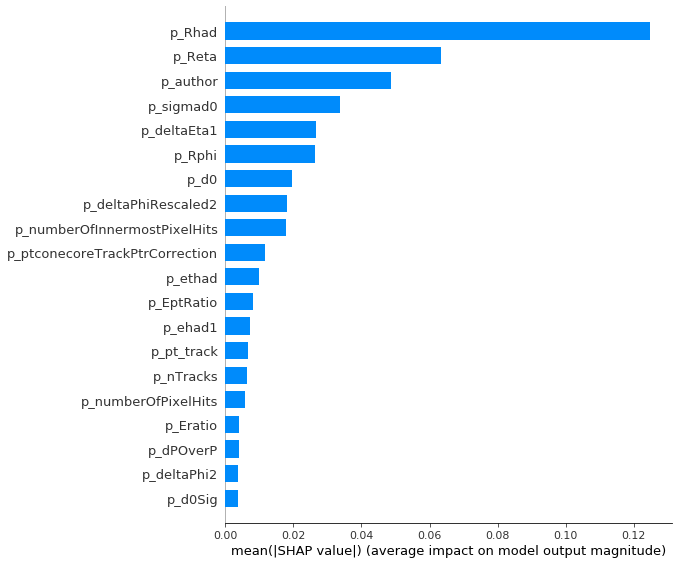

In [68]:
shap.summary_plot(shap_values[1], input_train, plot_type='bar')

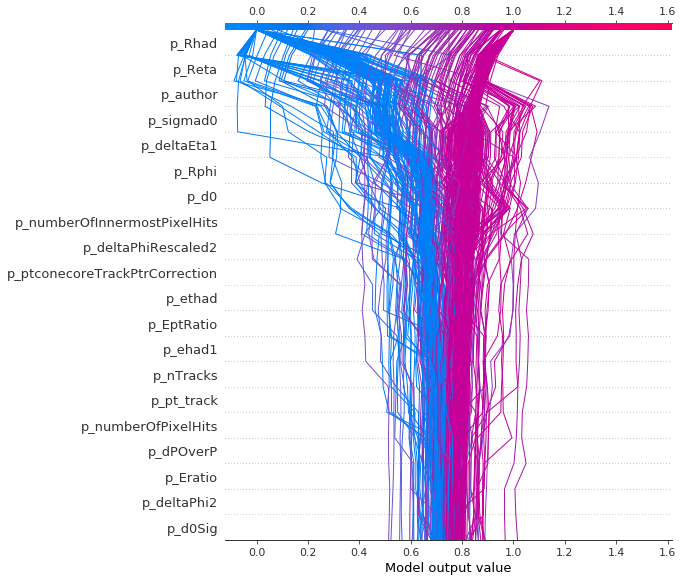

In [82]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][:500,:], input_train[:5000])

In [83]:
shap_sum = np.abs(shap_values[1]).mean(axis=0)
importance_df = pd.DataFrame([input_train.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
50,p_Rhad,0.12489
45,p_Reta,0.0633773
80,p_author,0.0485835
15,p_sigmad0,0.0335507
52,p_deltaEta1,0.0267517
...,...,...
33,p_eAccCluster,0
136,p_widths2,0
116,p_nCells_Lr1_LowG,0
139,p_e237,0


In [84]:
top_feats = importance_df[importance_df['shap_importance'] > 0.0050]
topf = top_feats.sort_index()
top_feats_arr = topf.to_numpy()
top_variables = top_feats_arr[:,0]

X_train_new = train[top_variables]
input_train2, input_valid2, truth_train2, truth_valid2 = train_test_split(X_train_new, y, test_size=0.33, random_state=42)

In [85]:
# Do the training on my train dataset, also measuring the time taken
print('--------- TRAINING ---------')
start_time2 = timeit.default_timer()
model.fit(np.array(input_train2), np.array(truth_train2))  ## This trains the model on input_train by comparing to the true values in truth_train.
elapsed2 = timeit.default_timer() - start_time2
print('----------TRAINING DONE -----') 
print(f"Training time for {len(top_variables)} variables with more impact: {elapsed2:6.3f}s")

--------- TRAINING ---------
----------TRAINING DONE -----
Training time for 16 variables with more impact:  5.369s


In [86]:
# Apply my model to the validation dataset to get the predictions
predictions = model.predict_proba(input_valid2) # this asks the trained model to make predictions on input_valid. Notice we're not giving it any truth values!
predictions = pd.DataFrame(predictions)
predictions.columns = ['not_electron', 'electron']
predictions = (predictions['electron'])/(predictions['electron'] + predictions['not_electron'])
predictions = pd.DataFrame(predictions)
predictions.columns = ['pred_elec']

In [87]:
# Convert the prediction and the validation truth from pandas dataframes to array
pred = predictions.to_numpy()
valid_labels = truth_valid2.to_numpy()

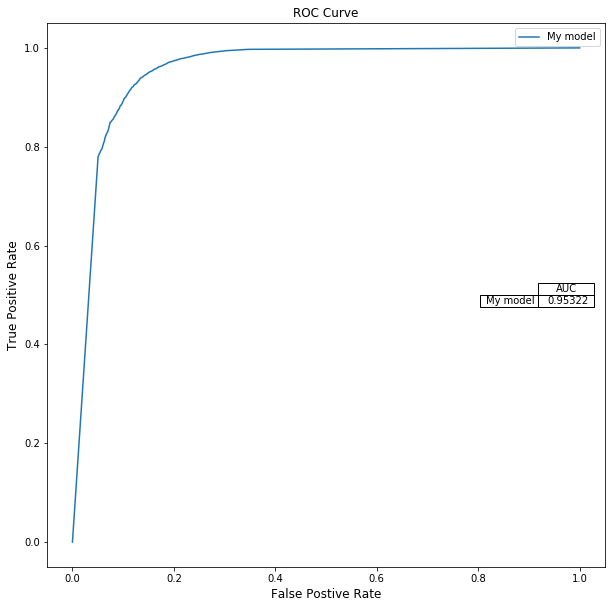

In [88]:
# Make the ROC curve. Compute the false positive rate and true positive rate arrays
fpr, tpr, _ = roc_curve(truth_valid2, predictions)

# Compute the AUC value under the ROC curve
auc_score = auc(fpr,tpr)

# Plot the results
fig = plt.figure(figsize = [10,10])
plt.title('ROC Curve', size = 12)
plt.plot(fpr,tpr, label = 'My model')
plt.legend()
plt.xlabel('False Postive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
### This just plots a table with the AUC-scores.
row_labels=['My model']
table_vals=[[round(auc_score,5)]]
col_labels=['AUC']
the_table = plt.table(cellText=table_vals,
                  colWidths = [0.1]*3,
                  rowLabels=row_labels,
                  colLabels=col_labels,
                  loc='center right')

In [89]:
# Make the confusion matrix
N = [[0,0], [0,0]]   
for i in np.arange(len(pred)):
    if (pred[i] == 0 and valid_labels[i] == 0) : N[0][0] += 1 # True negative guessed
    if (pred[i] == 0 and valid_labels[i] == 1) : N[0][1] += 1 # Wrong guess
    if (pred[i] == 1 and valid_labels[i] == 0) : N[1][0] += 1 # Wrong guess
    if (pred[i] == 1 and valid_labels[i] == 1) : N[1][1] += 1 # True positive guessed
fracWrong = float(N[0][1]+N[1][0])/float(len(pred)) # Compute the wrong fraction and print it in percentage
print(f"Fraction wrong: {fracWrong*100:6.4}%")

Fraction wrong:  1.483%


In [90]:
# Now I apply my trained model to the test dataset
test_var = test[top_variables] # Select the corresponding variables on which it was trained
testing = model.predict_proba(test_var) # Do the classification
testing = pd.DataFrame(testing) # Convert it to dataframe
testing.columns = ['not_electron', 'electron'] # Column 0 is not electron, 1 is electron
testing = (testing['electron'])/(testing['electron'] + testing['not_electron']) # Compute the result
freq_t = 0
for kk in testing:
    if kk >= 0.5000:
        freq_t += 1
leng_test = len(testing)
freq_test_dataset = freq_t / leng_test
testing = pd.DataFrame(predictions) # Convert it to dataframe
testing.columns = ['test_elec'] # The remaining column is the final result

print("The final results on the test dataset are the following:")
print(testing)
print(f"They have been obtained with a tree classification training on the following {len(top_variables)} variables:")
print(top_variables)

print(f"In the test dataset, the fraction of positive events is {freq_test_dataset*100:5.4f}% on a total of {leng_test} events.")

The final results on the test dataset are the following:
       test_elec
0        1.00000
1        1.00000
2        1.00000
3        1.00000
4        0.50000
...          ...
53620    0.84375
53621    1.00000
53622    0.00000
53623    1.00000
53624    1.00000

[53625 rows x 1 columns]
They have been obtained with a tree classification training on the following 16 variables:
['p_nTracks' 'p_pt_track' 'p_d0' 'p_sigmad0' 'p_EptRatio' 'p_Reta'
 'p_Rphi' 'p_Rhad' 'p_deltaEta1' 'p_deltaPhiRescaled2'
 'p_numberOfInnermostPixelHits' 'p_numberOfPixelHits' 'p_author' 'p_ethad'
 'p_ptconecoreTrackPtrCorrection' 'p_ehad1']
In the test dataset, the fraction of positive events is 76.8803% on a total of 160651 events.
